In [35]:
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr

In [37]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

TRAIN_AUDIO_DIR = r'C:\Users\dilee\Downloads\SHL ASSIGNMENT\audios\train'
TEST_AUDIO_DIR = r'C:\Users\dilee\Downloads\SHL ASSIGNMENT\audios\test'

In [39]:
def extract_features(file_path, sr=16000, n_mfcc=13):
    try:
        y, _ = librosa.load(file_path, sr=sr)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        mfcc_mean = mfcc.mean(axis=1)
        return mfcc_mean
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return np.zeros(n_mfcc)

# Extract training features
print("Extracting features from training data...")
X = []
y = []

for _, row in train_df.iterrows():
    path = os.path.join(TRAIN_AUDIO_DIR, row['filename'])
    features = extract_features(path)
    X.append(features)
    y.append(row['label'])

X = np.array(X)
y = np.array(y)

Extracting features from training data...


In [41]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ==========================
# 5. TRAIN MODEL
# ==========================
print("Training model...")

Training model...


In [43]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [45]:
print("Evaluating model...")
y_pred = model.predict(X_val)


Evaluating model...


In [47]:
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
corr, _ = pearsonr(y_val, y_pred)

print(f"Validation RMSE: {rmse:.4f}")
print(f"Pearson Correlation: {corr:.4f}")


Validation RMSE: 0.9576
Pearson Correlation: 0.6429


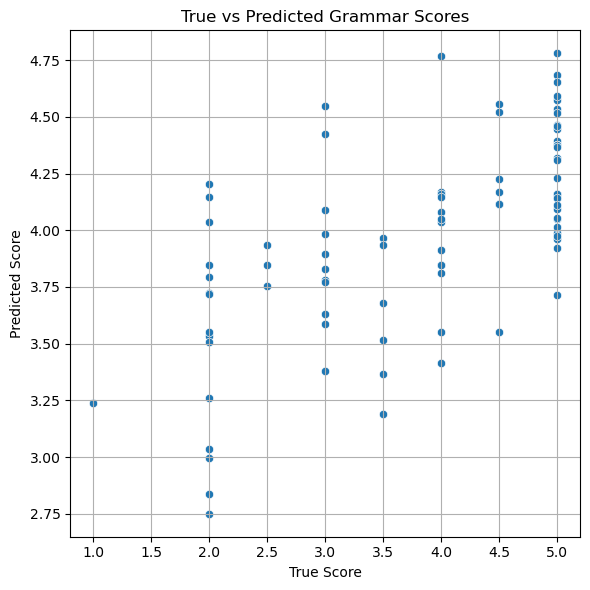

In [49]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_val, y=y_pred)
plt.xlabel("True Score")
plt.ylabel("Predicted Score")
plt.title("True vs Predicted Grammar Scores")
plt.grid(True)
plt.tight_layout()
plt.show()

In [57]:
print("Generating test predictions...")
test_features = []

for file_name in test_df['filename']:
    path = os.path.join(TEST_AUDIO_DIR, file_name)
    features = extract_features(path)
    test_features.append(features)

test_features = np.array(test_features)
test_preds = model.predict(test_features)

submission = pd.DataFrame({
    'filename': test_df['filename'],
    'label': test_preds
})
submission.to_csv('submission.csv', index=False)
print("Submission file saved as submission.csv")

Generating test predictions...
Submission file saved as submission.csv


In [59]:
import joblib

# Save the model
joblib.dump(model, 'grammar_score_model.pkl')
print("Model saved as 'grammar_score_model.pkl'")


Model saved as 'grammar_score_model.pkl'
